In [1]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('dementia_dataset.csv')
print(df1.shape)
df1.head(10)
df1['Group'].unique()
df2 = df1.loc[df1['Group'] == 'Converted']
# Dropping the rows from df1 that have been assigned to df2 using the corresponding index values
df1 = df1.drop(df2.index)

df2.head(10)
# Creating a new column 'Last_Visit' to identify the last visit for each patient
df2['Last_Visit'] = df2.groupby('Subject ID')['Visit'].transform('max')

(373, 15)


In [2]:
# Updating the 'Group' column based on 'Visit' and 'Last_Visit' conditions
df2.loc[df2['Visit'] < df2['Last_Visit'], 'Group'] = 'Nondemented'
df2.loc[df2['Visit'] == df2['Last_Visit'], 'Group'] = 'Demented'
# Dropping the 'Last_Visit' column
df2.drop('Last_Visit', axis=1, inplace=True)

# Displaying the updated DataFrame
df2.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Nondemented,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Nondemented,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Demented,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Nondemented,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Nondemented,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093


In [3]:
frames = [df1, df2]
df = pd.concat(frames)

df['Group'].unique()
# Renaming the 'M/F' column to 'Gender' in the DataFrame
df.rename(columns={'M/F': 'Gender'}, inplace=True)

# Display the current column names
print(df.columns)

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'Gender', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


In [4]:
# Drop unnecessary columns from the DataFrame if they exist
columns_to_drop = ['Subject ID', 'MRI ID', 'Hand', 'Visit', 'MR Delay']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)
df.isna().sum()
# Imputing missing values in the 'SES' column with the mode
df.SES.fillna(df.SES.mode()[0], inplace=True)

In [5]:
# Imputing missing values in the 'MMSE' column with the mean
df.MMSE.fillna(df.MMSE.mean(), inplace=True)

In [6]:
df.isna().sum()
import matplotlib.pyplot as plt
import seaborn as sns

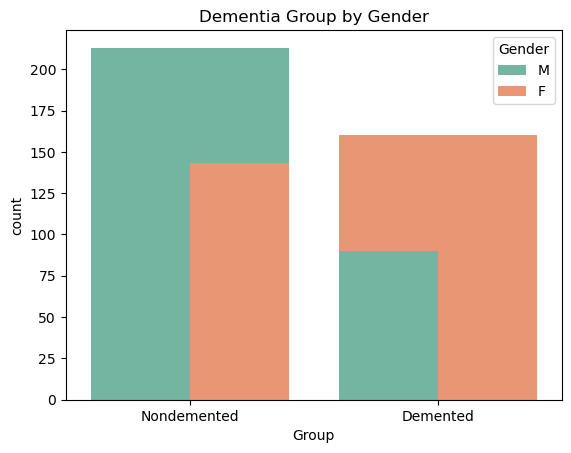

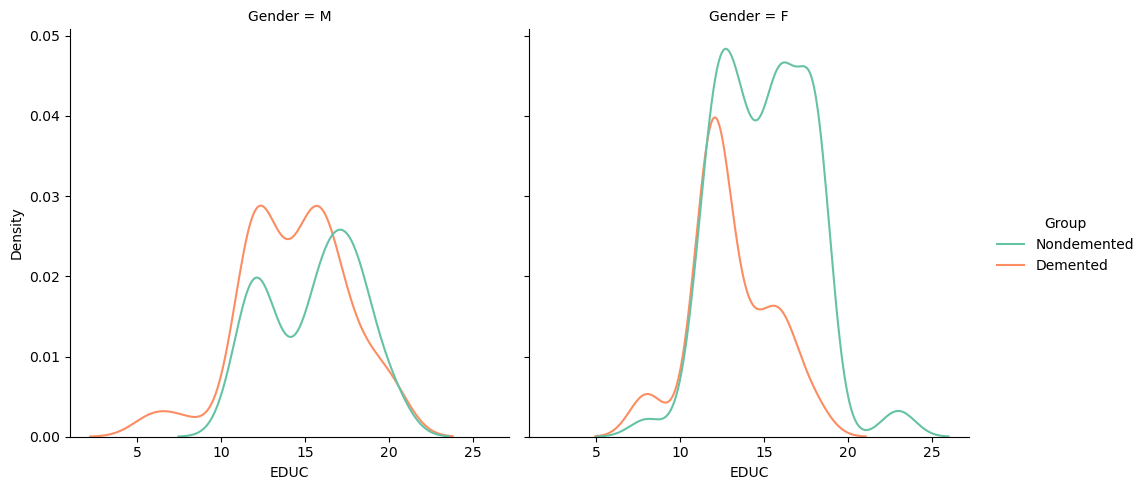

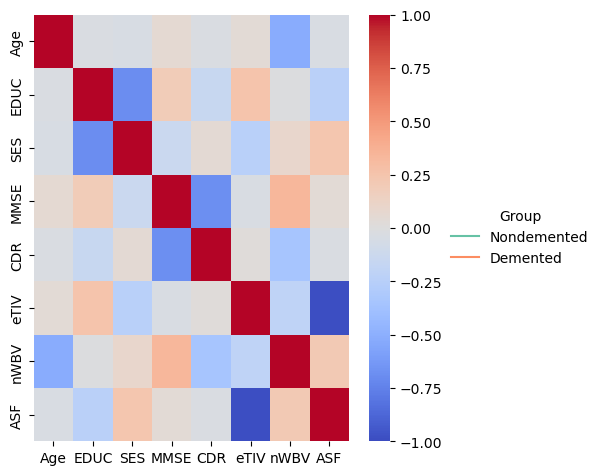

In [7]:
# Creating a count plot with 'Group' on the x-axis
sns.countplot(data=df, x='Group', palette='Set2').set(title = 'Dementia Group by Laxman');

# Visualizing the distribution of 'Group' by 'Gender' using a count plot
sns.countplot(data=df, x='Group', palette='Set2', hue='Gender').set(title = 'Dementia Group by Gender');


# Visualizing the distribution of Education for each 'Gender' and 'Group'
sns.displot(data=df, x='EDUC', col='Gender', palette='Set2', hue='Group', kind='kde')


# Visualizing the distribution of 'Age' for each 'Group'
sns.displot(data=df, x='Age', hue='Group', kind="kde", palette='Set2');

# Visualizing the correlation matrix of numeric columns using a heatmap
sns.heatmap(df.corr(numeric_only=True), vmin=-1, cmap='coolwarm');

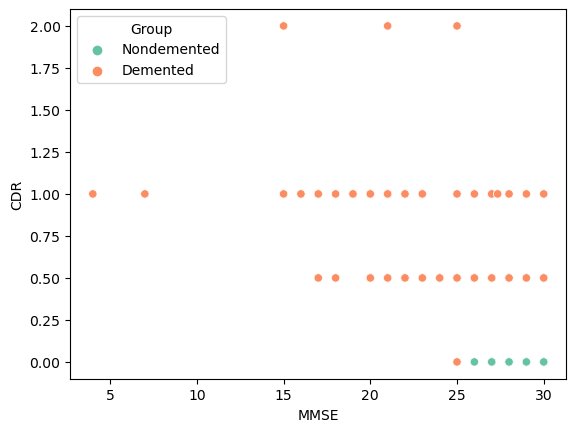

In [8]:
# Check if 'ASF' column exists before dropping
if 'ASF' in df.columns:
    df.drop(columns=['ASF'], inplace=True)
else:
    print("Column 'ASF' not found in the DataFrame.")


# Visualizing the relationship between 'MMSE' and 'CDR' variables with respect to 'Group'
sns.scatterplot(data=df, x='MMSE', y='CDR', palette='Set2', hue='Group');

In [9]:
# Importing the necessary library for label encoding
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder class
le = LabelEncoder()

# Encoding the 'Gender' column in the DataFrame
df.Gender = le.fit_transform(df.Gender.values)

# Printing the mapping of encoded values to original classes for 'Gender'
print(f'Sex:\n0 : {le.classes_[0]}\n1 : {le.classes_[1]}\n\n')

df.Group = le.fit_transform(df.Group.values)
print(f'Group:\n0 : {le.classes_[0]}\n1 : {le.classes_[1]}')

Sex:
0 : F
1 : M


Group:
0 : Demented
1 : Nondemented


In [10]:
# Importing the necessary library for train-test split
from sklearn.model_selection import train_test_split

# Assigning the 'Group' column as the target variable
y = df.Group

# Assigning the remaining columns as the features
X = df.drop(['Group'], axis=1)

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Importing the necessary library for Random Forest classification
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting the target variable for the test data
y_hat = model.predict(X_test)

In [12]:
# Importing the necessary libraries for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_hat))
print('Precision:', precision_score(y_test, y_hat, average='binary'))
print('Recall:', recall_score(y_test, y_hat, average='binary'))
print('F1 Score:', f1_score(y_test, y_hat, average='binary') )

Accuracy Score: 0.9733333333333334
Precision: 1.0
Recall: 0.9512195121951219
F1 Score: 0.975


In [13]:
import pandas as pd

def predict_dementia(gender, age, educ, ses, mmse, cdr, etiv, nwbv):
    # Encoding gender using LabelEncoder
    gender_encoded = 0  # Default value for Male
    
    if gender.lower() == 'f':
        gender_encoded = 1  # Set to 1 for Female
    
    # Creating a DataFrame with the input details
    input_data = pd.DataFrame({
        'Gender': [gender_encoded],
        'Age': [age],
        'EDUC': [educ],
        'SES': [ses],
        'MMSE': [mmse],
        'CDR': [cdr],
        'eTIV': [etiv],
        'nWBV': [nwbv]
    })

    # Predicting dementia group using the trained model
    probability_demented = model.predict_proba(input_data)[:, 1][0]
    probability_percentage = probability_demented * 100
    
    # Categorizing into Low, Mild, and High risk categories
    if probability_demented < 0.33:
        risk_category = "Low"
    elif probability_demented < 0.66:
        risk_category = "Mild"
    else:
        risk_category = "High"

    # Formatting the probability as a percentage
    probability_formatted = f"{probability_percentage:.2f}%"
    
    return probability_formatted, risk_category

# Example usage of the function
gender = 'F'  # Replace with the actual gender (F or M)
age = 70  # Replace with the actual age
educ = 12  # Replace with the actual education level
ses = 2.0  # Replace with the actual socioeconomic status
mmse = 28.0  # Replace with the actual MMSE score
cdr = 0.5  # Replace with the actual CDR score
etiv = 1600  # Replace with the actual eTIV value
nwbv = 0.7  # Replace with the actual nWBV value

probability, risk_category = predict_dementia(gender, age, educ, ses, mmse, cdr, etiv, nwbv)
print(f"The probability of being demented is: {probability} ({risk_category} Risk)")


The probability of being demented is: 5.00% (Low Risk)
